# Persiapan dan Analisis Data

### Import Data

In [173]:
import numpy as np
import pandas as pd

In [174]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1KhHuJrSxyE_tnXKCR2QXqwvdGsCC-ur2/export?format=csv')

In [175]:
df.head()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [176]:
df.drop(['Class'],axis=1,inplace=True)

In [177]:
df.shape[0]

5656

In [178]:
# df = df.head(100)

In [179]:
print("test")

test


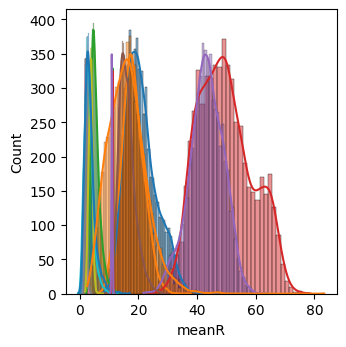

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(df, 1):
    plt.subplot(3, 5, 1)  # 3 baris dan 5 kolom
    sns.histplot(df[feature], kde=True)

plt.tight_layout()
plt.show()

### Informasi Statistik Dasar

In [181]:
statistika_deskriptif = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Minimum': df.min(),
    'Maximum': df.max(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Median': df.quantile(0.5),
    'Q3': df.quantile(0.75),
})

display(statistika_deskriptif)

,Mean,Standard Deviation,Minimum,Maximum,Range,Q1,Median,Q3
meanR,20.894382,5.260718,6.854176,46.994451,40.140274,17.015386,20.055104,23.933250
meanG,18.023509,3.885058,6.259336,37.866338,31.607002,15.462487,17.823574,20.508286
meanB,5.562521,1.572465,1.823841,14.023399,12.199558,4.469088,5.206807,6.298417
stdR,49.518673,9.091646,23.889681,78.573397,54.683716,42.518804,48.737837,55.533851
stdG,43.181128,5.799811,21.816707,63.912439,42.095732,39.565446,43.274979,47.258675
stdB,16.216090,2.737406,7.831019,29.260652,21.429632,14.261454,15.830328,17.684630
skewR,2.164332,0.298941,1.154889,3.582313,2.427425,1.962475,2.147151,2.337118
skewG,2.232326,0.340901,1.203163,3.997579,2.794416,2.003130,2.188874,2.405244
skewB,3.745612,0.647198,1.944842,7.961952,6.017110,3.304125,3.764237,4.170742
kurR,3.208423,1.533598,-0.531692,12.941081,13.472773,2.161075,3.023438,3.989808


### Missing Value

In [182]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
dtype: int64

### Distribusi Data

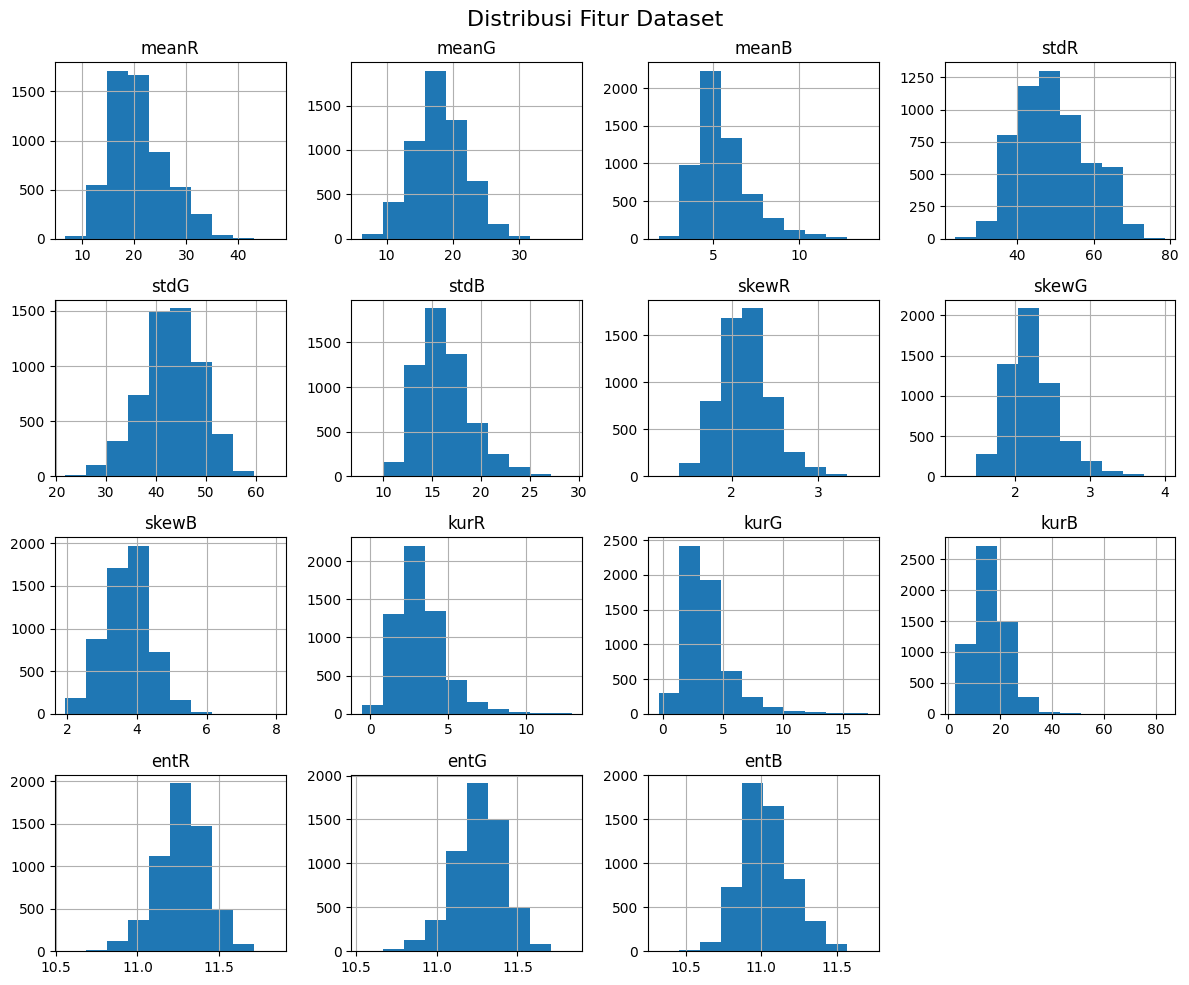

In [183]:
# import matplotlib.pyplot as plt
# import seaborn as sns

df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset', fontsize=16)
plt.tight_layout()
plt.show()

### Mengidentifikasi Outlier

In [184]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# To find outliers for all columns:
for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    outliers_sum = outliers.shape[0]
    if outliers.shape[0] > 0:  # Check if there are any outliers
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 65
Outliers in meanG: 50
Outliers in meanB: 211
Outliers in stdR: 3
Outliers in stdG: 41
Outliers in stdB: 143
Outliers in skewR: 109
Outliers in skewG: 170
Outliers in skewB: 34
Outliers in kurR: 170
Outliers in kurG: 288
Outliers in kurB: 87
Outliers in entR: 99
Outliers in entG: 87
Outliers in entB: 74


In [185]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# To find the number of outliers for all columns:
for column in df.columns:
    outliers = find_outliers_zscore(df, column)
    outliers_sum = outliers.shape[0]  # Get the number of outliers
    if outliers_sum > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 17
Outliers in meanG: 16
Outliers in meanB: 94
Outliers in stdR: 1
Outliers in stdG: 13
Outliers in stdB: 54
Outliers in skewR: 45
Outliers in skewG: 63
Outliers in skewB: 20
Outliers in kurR: 72
Outliers in kurG: 97
Outliers in kurB: 40
Outliers in entR: 27
Outliers in entG: 27
Outliers in entB: 23


# Preprocessing Data

### Imputasi Outlier dengan Nilai Mean

In [186]:
# th = 3
# for column in df.columns:
#     z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
#     mean = df[column].mean()

#     df[column] = np.where(z_scores > th, mean, df[column])

In [187]:
# df.hist(figsize=(12, 10))  # Adjust figure size as needed
# plt.suptitle('Distribusi Fitur Dataset Setelah Imputasi', fontsize=16)
# plt.tight_layout()
# plt.show()

### Standarisasi Z-Score

In [188]:
from sklearn.preprocessing import StandardScaler

zscore = StandardScaler()
df_zscore = zscore.fit_transform(df)
df = pd.DataFrame(df_zscore, columns=df.columns)

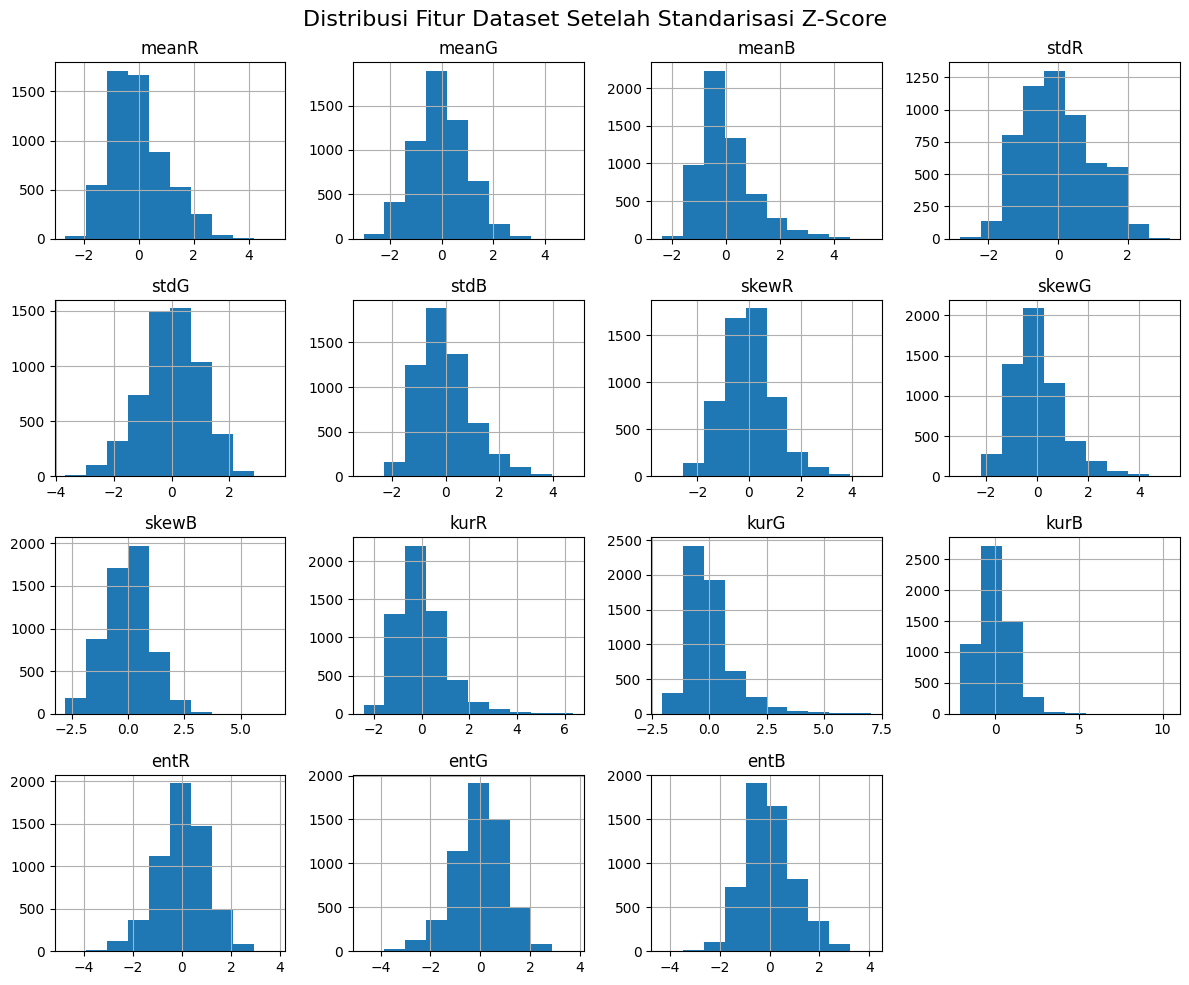

In [189]:
df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset Setelah Standarisasi Z-Score', fontsize=16)
plt.tight_layout()
plt.show()

### PCA

In [190]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(df)

num_components = 2

pca_reduced = PCA(n_components=num_components)
X_reduced = pca_reduced.fit_transform(df)

columns = [f'PC{i+1}' for i in range(num_components)]
df = pd.DataFrame(X_reduced, columns=columns)

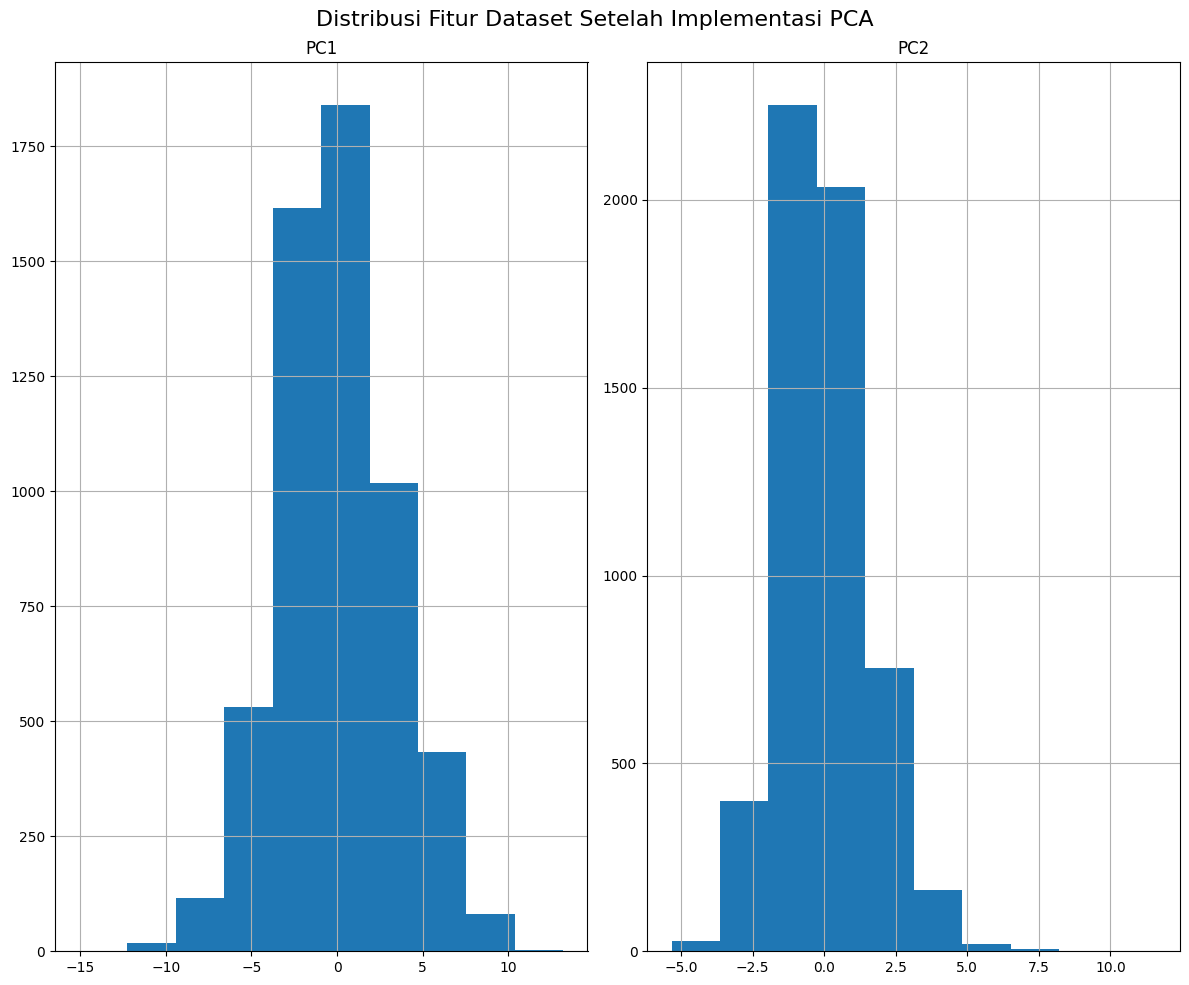

In [191]:
df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset Setelah Implementasi PCA', fontsize=16)
plt.tight_layout()
plt.show()

In [192]:
df.head()

,PC1,PC2
0,-0.738357,1.602585
1,-1.514797,1.284781
2,-0.600808,0.217052
3,-0.350192,1.006064
4,-2.549994,-0.572403


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5656 non-null   float64
 1   PC2     5656 non-null   float64
dtypes: float64(2)
memory usage: 88.5 KB


### Normalisasi MinMax

In [194]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

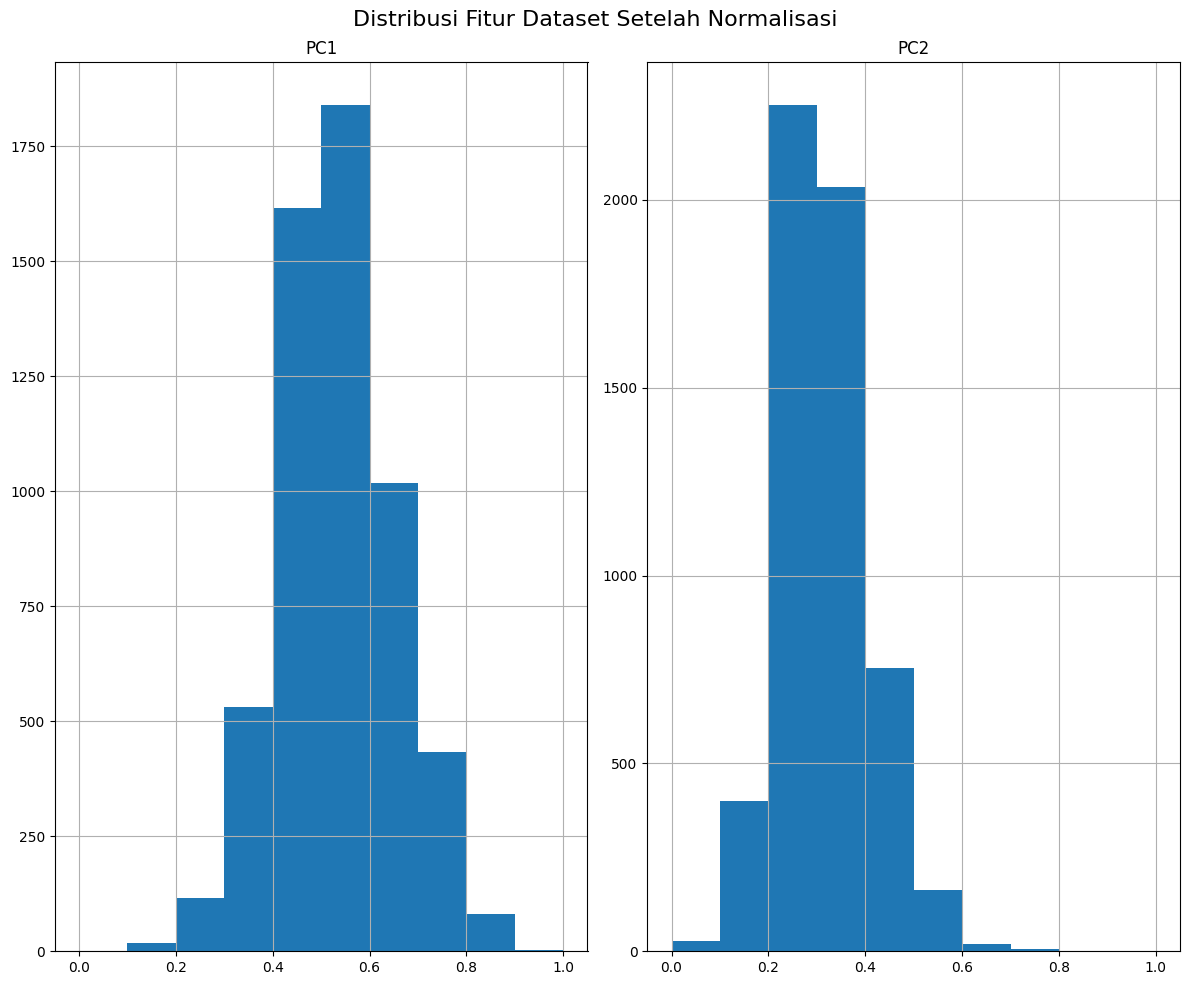

In [195]:
df.hist(figsize=(12, 10))  # Adjust figure size as needed
plt.suptitle('Distribusi Fitur Dataset Setelah Normalisasi', fontsize=16)
plt.tight_layout()
plt.show()

# Model

In [228]:
def SOM(train, w, cluster, R, max_epoch, lr, R_change):
  d = []
  closest_neighbors = []
  w_out = []

  for i in range(max_epoch):
    for j in range(len(train)):
      data = train[j]
      d_in = []
      w_to_update = []

      for k in range(len(w)):
         d_in.append(np.linalg.norm(data - w[k]))

      d_out_indices = np.argsort(d_in)
      if i == max_epoch-1:
        closest_neighbor_index = d_out_indices[0]
        closest_neighbors.append(closest_neighbor_index)
      
      d.append(np.copy(d_in[d_out_indices[0]]))
      
      w_to_update = d_out_indices[:R + 1]

      for l in w_to_update :
        dw = (np.multiply(lr,(np.subtract(data, w[l]))))
        w[l] = np.add(w[l], dw)
      w_out.append(np.copy(w))
    lr *= 0.5
    if((i+1)%R_change == 0):
      R = np.random.randint(0,cluster)

  return d, w, closest_neighbors, w_out

## Calculating Error

In [197]:
def quantization_error(train, w, closest_neighbors):
  total_error = 0
  for i, data in enumerate(train):
    bmu = w[closest_neighbors[i]]
    total_error += np.linalg.norm(data - bmu)
  return total_error / len(train)

def topographic_error(train, w, closest_neighbors):
  error_count = 0
  for i, data in enumerate(train):
    # Calculate distances to all neurons
    distances = [np.linalg.norm(data - weight) for weight in w]

    # Find BMU and second BMU
    sorted_indices = np.argsort(distances)
    closest_neighbors = sorted_indices[0]
    second_closest_neighbors = sorted_indices[1]

    # Check if second BMU is adjacent to BMU in the grid
    if abs(closest_neighbors - second_closest_neighbors) > 1:  # Simplified adjacency check
      error_count += 1

  return error_count / len(train)


def count_error(train, w, closest_neighbors):
  qe = quantization_error(train, w, closest_neighbors)
  te = topographic_error(train, w, closest_neighbors)
  return qe, te

# Tuning Hyperparameter

## Tuning Manual

In [241]:
size = df.shape[1]
te_qe_manual_plot = []

def generate_random_parameters(size):
  cluster = np.random.randint(2, 10)
  w = np.random.rand(cluster, size)
  R = np.random.randint(0, cluster)
  lr = np.random.uniform(1e-10, 0.1)
  R_change = np.random.randint(1, 10)
  max_epoch = np.random.randint(10, 100)

  return cluster, w, R, lr, R_change, max_epoch

def tuning(iter):
  used_parameters = set()
  best_parameter = []
  best_min_error = [1e1000,0,0]

  for i in range(iter):
    while True:
      cluster, w, R, lr, R_change, max_epoch = generate_random_parameters(size)

      param_tuple = (cluster, w.tobytes(), R, lr, R_change, max_epoch)

      if param_tuple not in used_parameters:
        used_parameters.add(param_tuple)
        break

    tuning_data = df.to_numpy()
    print(f'Tuning {i+1}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    d, w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr = lr, max_epoch=max_epoch, R_change=R_change)

    qe, te = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}')

    if qe+te < best_min_error[0]:
      best_min_error[0] = qe+te
      best_min_error[1] = qe
      best_min_error[2] = te
      best_parameter = [i, cluster, w, R, lr, R_change, max_epoch]
      
    te_qe_manual_plot.append((te,qe))
    
    print(f'best parameter is tuning {best_parameter[0]+1}, with error qe : {best_min_error[1]} and te : {best_min_error[2]}\n')
  return best_parameter

best_parameter_manual = tuning(10)

Tuning 1, cluster : 6, R : 0, lr : 0.03744978306300325, R change : 3, max epoch : 27
qe : 0.10901479419037607, te : 0.7378005657708628
best parameter is tuning 1, with error qe : 0.10901479419037607 and te : 0.7378005657708628

Tuning 2, cluster : 8, R : 6, lr : 0.07940167873727386, R change : 7, max epoch : 84
qe : 0.09066173477831242, te : 0.5991867043847242
best parameter is tuning 2, with error qe : 0.09066173477831242 and te : 0.5991867043847242

Tuning 3, cluster : 4, R : 3, lr : 0.03309539561246773, R change : 3, max epoch : 45
qe : 0.11173573324390212, te : 0.015558698727015558
best parameter is tuning 3, with error qe : 0.11173573324390212 and te : 0.015558698727015558

Tuning 4, cluster : 8, R : 3, lr : 0.0503014174906265, R change : 8, max epoch : 36
qe : 0.10071532438915465, te : 0.8935643564356436
best parameter is tuning 3, with error qe : 0.11173573324390212 and te : 0.015558698727015558

Tuning 5, cluster : 8, R : 1, lr : 0.00552028419801667, R change : 3, max epoch : 9

## Tuning dengan OPTUNA

In [242]:
import optuna

size = df.shape[1]
te_qe_optuna_plot = []

def tuning(trial):
    
    cluster = trial.suggest_int("cluster", 2, 10)
    w = np.random.rand(cluster, size)
    R = trial.suggest_int("R", 0, cluster - 1)
    lr = trial.suggest_float("lr", 1e-10, 0.1, log=True)
    R_change = trial.suggest_int("R_change", 1, 10)
    max_epoch = trial.suggest_int("max_epoch", 10, 100)

    tuning_data = df.to_numpy()
    print(f'Trial {trial.number}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    
    d, w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr=lr, max_epoch=max_epoch, R_change=R_change)

    qe, te = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}')

    total_error = qe + te
    te_qe_optuna_plot.append((te, qe))
    return total_error

study = optuna.create_study(direction="minimize") 
study.optimize(tuning, n_trials=10)

[I 2024-11-19 23:26:33,764] A new study created in memory with name: no-name-ad0a3de8-4cb3-4ca1-b0ac-8b8edb371910


Trial 0, cluster : 8, R : 4, lr : 0.0008576525424959776, R change : 8, max epoch : 84


[I 2024-11-19 23:26:54,799] Trial 0 finished with value: 1.0632555839024738 and parameters: {'cluster': 8, 'R': 4, 'lr': 0.0008576525424959776, 'R_change': 8, 'max_epoch': 84}. Best is trial 0 with value: 1.0632555839024738.


qe : 0.12725841275678784, te : 0.935997171145686
Trial 1, cluster : 5, R : 3, lr : 2.0240850341722784e-06, R change : 9, max epoch : 70


[I 2024-11-19 23:27:09,177] Trial 1 finished with value: 1.1922732885872045 and parameters: {'cluster': 5, 'R': 3, 'lr': 2.0240850341722784e-06, 'R_change': 9, 'max_epoch': 70}. Best is trial 0 with value: 1.0632555839024738.


qe : 0.31338361390545044, te : 0.8788896746817539
Trial 2, cluster : 5, R : 1, lr : 5.545685707960392e-10, R change : 6, max epoch : 89


[I 2024-11-19 23:27:19,137] Trial 2 finished with value: 0.22093848713137032 and parameters: {'cluster': 5, 'R': 1, 'lr': 5.545685707960392e-10, 'R_change': 6, 'max_epoch': 89}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.20873905290223313, te : 0.012199434229137199
Trial 3, cluster : 2, R : 0, lr : 3.509189445327151e-06, R change : 3, max epoch : 56


[I 2024-11-19 23:27:22,814] Trial 3 finished with value: 0.4732488647873996 and parameters: {'cluster': 2, 'R': 0, 'lr': 3.509189445327151e-06, 'R_change': 3, 'max_epoch': 56}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.4732488647873996, te : 0.0
Trial 4, cluster : 4, R : 2, lr : 0.010421922185592524, R change : 7, max epoch : 97


[I 2024-11-19 23:27:32,041] Trial 4 finished with value: 0.46120543164561306 and parameters: {'cluster': 4, 'R': 2, 'lr': 0.010421922185592524, 'R_change': 7, 'max_epoch': 97}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.10459298468663149, te : 0.3566124469589816
Trial 5, cluster : 8, R : 1, lr : 7.828422857911694e-09, R change : 4, max epoch : 89


[I 2024-11-19 23:27:46,974] Trial 5 finished with value: 1.277534074654901 and parameters: {'cluster': 8, 'R': 1, 'lr': 7.828422857911694e-09, 'R_change': 4, 'max_epoch': 89}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.32350295725744715, te : 0.954031117397454
Trial 6, cluster : 7, R : 3, lr : 0.09744472833581669, R change : 7, max epoch : 81


[I 2024-11-19 23:27:58,640] Trial 6 finished with value: 1.0537973294230627 and parameters: {'cluster': 7, 'R': 3, 'lr': 0.09744472833581669, 'R_change': 7, 'max_epoch': 81}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.12646352461401025, te : 0.9273338048090524
Trial 7, cluster : 3, R : 0, lr : 1.864250338945256e-09, R change : 7, max epoch : 14


[I 2024-11-19 23:27:59,787] Trial 7 finished with value: 0.7404805104104122 and parameters: {'cluster': 3, 'R': 0, 'lr': 1.864250338945256e-09, 'R_change': 7, 'max_epoch': 14}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.3394904114005112, te : 0.400990099009901
Trial 8, cluster : 6, R : 4, lr : 1.194035483128185e-08, R change : 1, max epoch : 60


[I 2024-11-19 23:28:08,806] Trial 8 finished with value: 1.093883681051246 and parameters: {'cluster': 6, 'R': 4, 'lr': 1.194035483128185e-08, 'R_change': 1, 'max_epoch': 60}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.23868566124926582, te : 0.8551980198019802
Trial 9, cluster : 6, R : 0, lr : 1.2119587843371051e-08, R change : 7, max epoch : 12


[I 2024-11-19 23:28:10,368] Trial 9 finished with value: 1.1543380707172795 and parameters: {'cluster': 6, 'R': 0, 'lr': 1.2119587843371051e-08, 'R_change': 7, 'max_epoch': 12}. Best is trial 2 with value: 0.22093848713137032.


qe : 0.2720891315376473, te : 0.8822489391796322


# Testing dengan Best Hyperparameter

## Testing dengan Hyperparameter Manual

In [229]:
train = df.to_numpy()

d, w, closest_neighbors, w_output = SOM(train, w=best_parameter_manual[2], cluster=best_parameter_manual[1], R=best_parameter_manual[3], lr = best_parameter_manual[4], R_change = best_parameter_manual[5], max_epoch=best_parameter_manual[6])
qe, te = count_error(train, w, closest_neighbors)
print(f'qe : {qe}, te : {te}')

qe : 0.0900595660022002, te : 0.49893917963224893


# Analysis

## Error Plot

### Manual Tuning

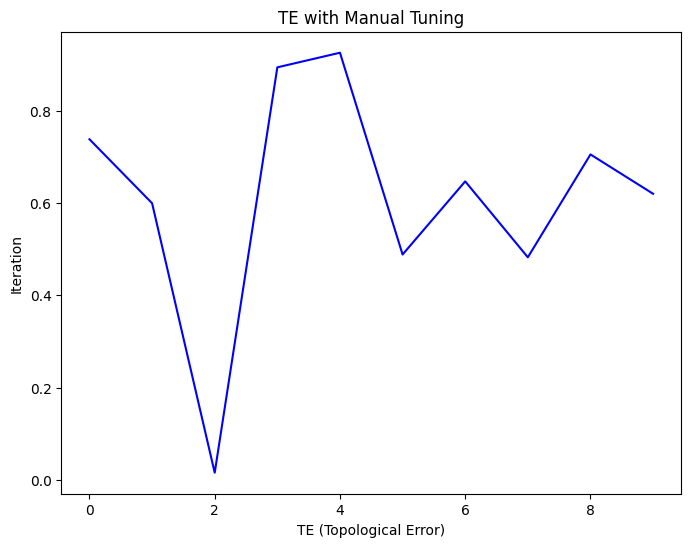

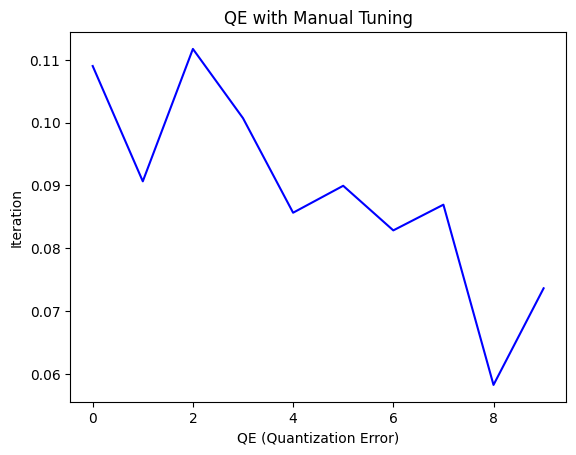

In [255]:
te_values, qe_values = zip(*te_qe_manual_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.xlabel("TE (Topological Error)")
plt.ylabel("Iteration")
plt.title("TE with Manual Tuning")
plt.show()
plt.plot(qe_values, c="blue", label="TE-QE points")
plt.xlabel("QE (Quantization Error)")
plt.ylabel("Iteration")
plt.title("QE with Manual Tuning")
plt.show()

### Optuna Tuning

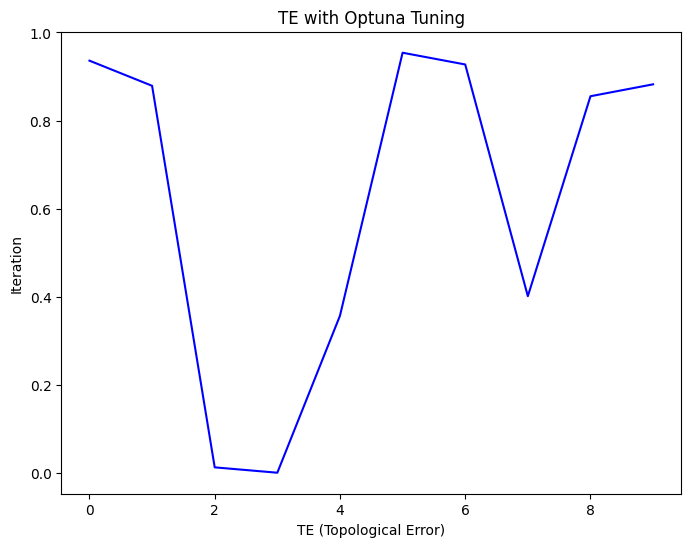

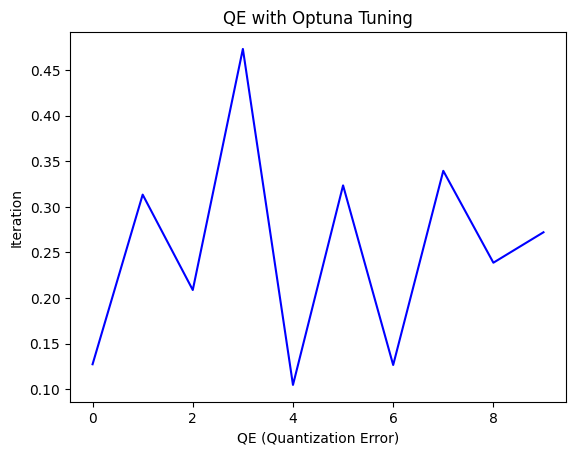

In [254]:
te_values, qe_values = zip(*te_qe_optuna_plot)
plt.figure(figsize=(8, 6))
plt.plot(te_values, c="blue", label="TE-QE points")
plt.xlabel("TE (Topological Error)")
plt.ylabel("Iteration")
plt.title("TE with Optuna Tuning")
plt.show()
plt.plot(qe_values, c="blue", label="TE-QE points")
plt.xlabel("QE (Quantization Error)")
plt.ylabel("Iteration")
plt.title("QE with Optuna Tuning")
plt.show()

## Weight Plot

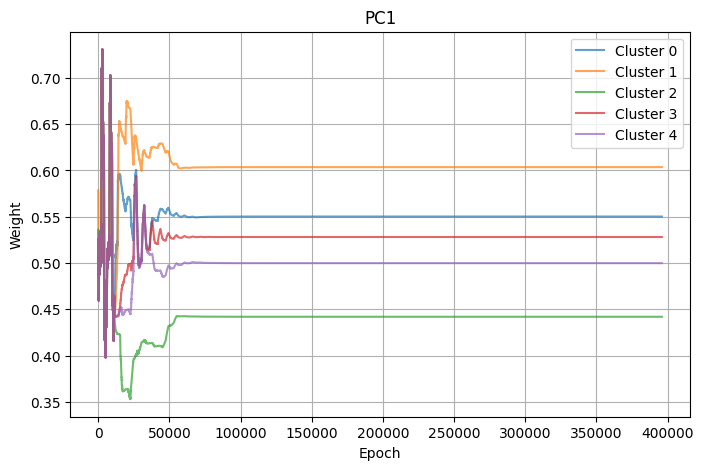

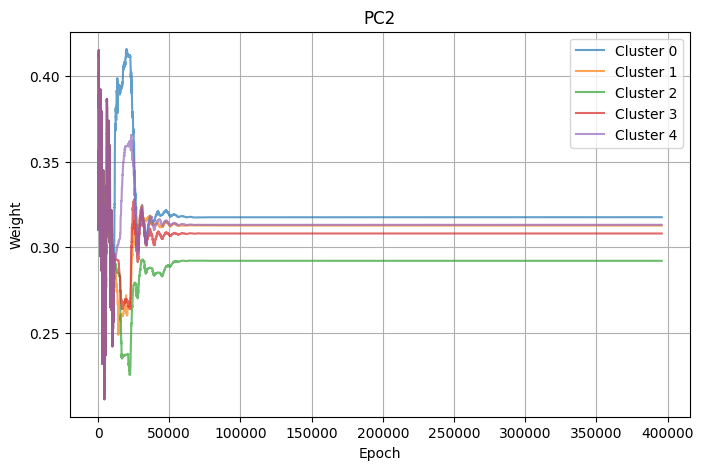

In [234]:
feature = df.columns.tolist()
w_output = np.array(w_output)

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Epoch")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

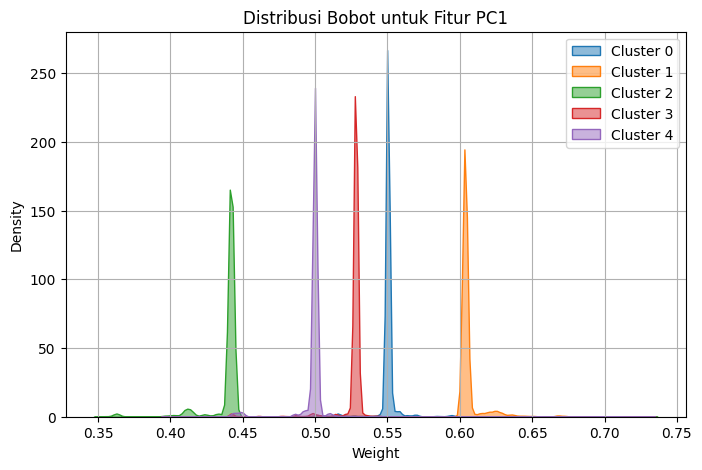

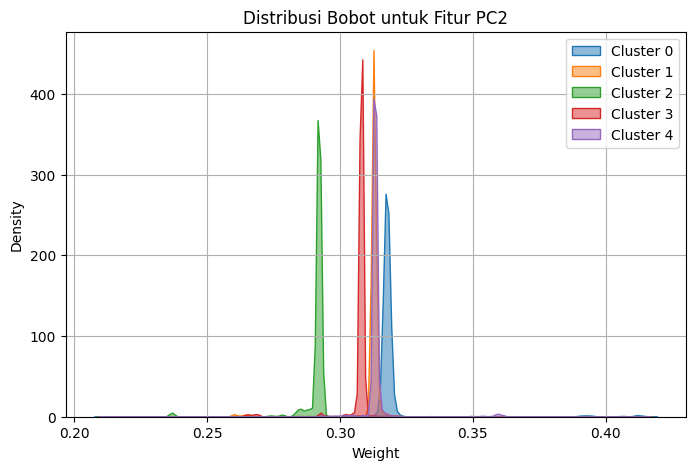

In [240]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_42224\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


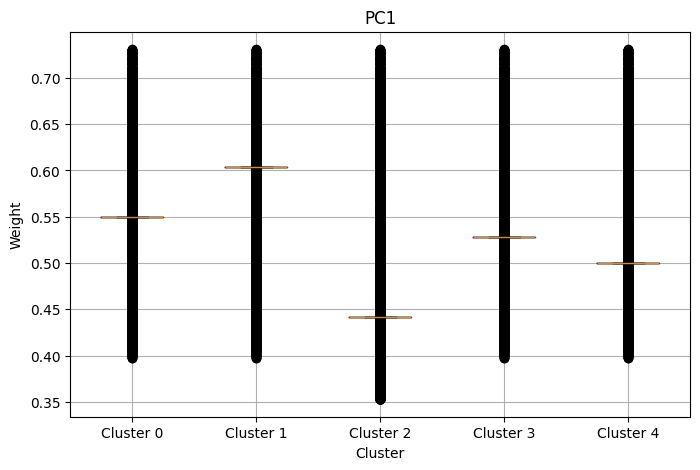

C:\Users\hadik\AppData\Local\Temp\ipykernel_42224\3753402374.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


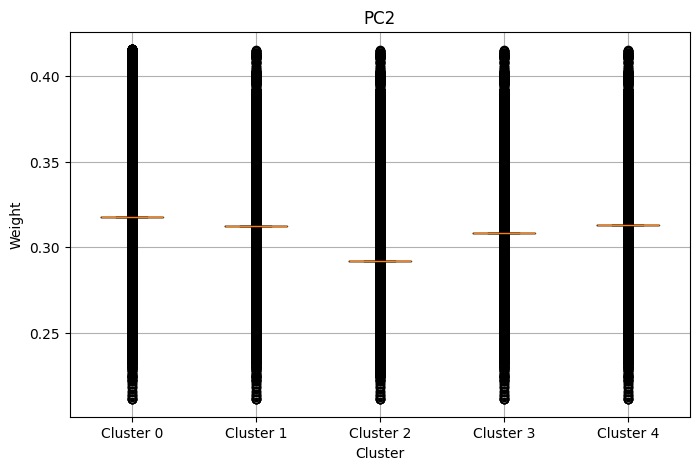

In [236]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


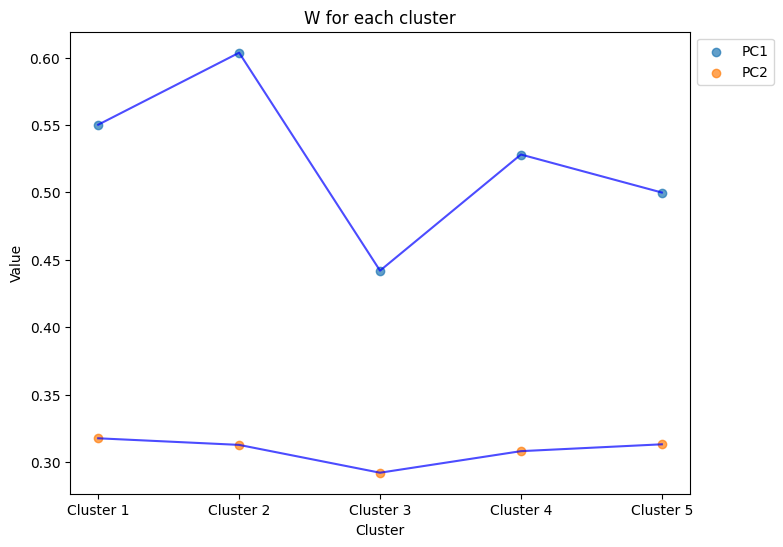

In [237]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w[i][j] for i in range(len(w))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w)), [f"Cluster {i+1}" for i in range(len(w))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Clustering Plot

C:\Users\hadik\AppData\Local\Temp\ipykernel_42224\2524868513.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))


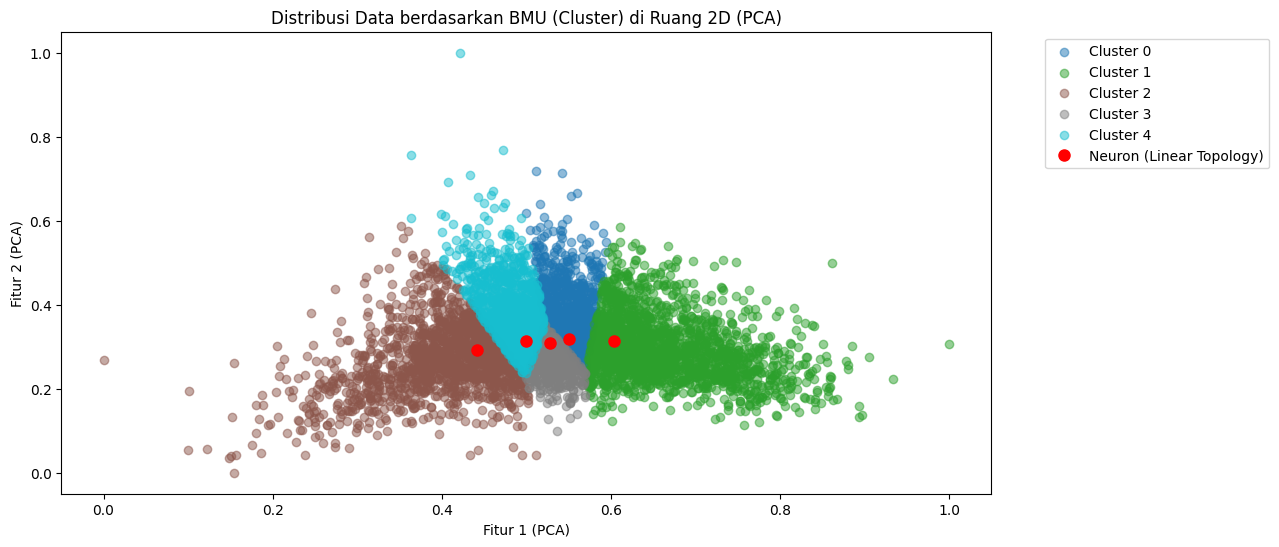

In [239]:

closest_neighbors = np.array(closest_neighbors)

plt.figure(figsize=(12, 6))

unique_bmu_indices_pca = np.unique(closest_neighbors)
colors = plt.cm.get_cmap("tab10", len(unique_bmu_indices_pca))

for i, bmu in enumerate(unique_bmu_indices_pca):
    cluster_data_pca = train[closest_neighbors == bmu]
    plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {bmu}', color=colors(i), alpha=0.5)

plt.plot(w[:, 0], w[:, 1], 'ro', label="Neuron (Linear Topology)", markersize=8)

plt.title("Distribusi Data berdasarkan BMU (Cluster) di Ruang 2D (PCA)")
plt.xlabel("Fitur 1 (PCA)")
plt.ylabel("Fitur 2 (PCA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()